# Do logarithmic proximity measures outperform plain ones in graph clustering?

In [1]:
from collections import defaultdict
from itertools import combinations
import pickle
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics import adjusted_rand_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
from py_graphs.graphs.generator import StochasticBlockModel
from py_graphs.measure import *
from py_graphs.measure import H_kernels_plus_RSP_FE
from py_graphs.cluster.ward import Ward
from py_graphs.colors import d3

## 2. Logarithmic vs. plain measures
Let $G(N,(m)p_{in}, p_{out})$ be the model of generating random graphs on $N$ nodes divided into $m$ classes of the same size, with $p_{in}$ and pout being the probability of $(i, j) \in E(G)$ for $i$ and $j$ belonging to the same class and different classes, respectively, where $E(G)$ is the edge set of $G$.

The curves in Figures 1–3 present the adjusted Rand index (averaged over 200 random graphs) for clustering with Ward’s
method.

In [44]:
def classic_plot(measure_class, graphs, n_class, n_params):
    raw_param_dict = defaultdict(list)
    for graph_idx, (edges, nodes) in enumerate(tqdm(graphs, desc=measure_class.name)):
        measure = measure_class(edges)
        for param_flat in np.linspace(0, 1, n_params):
            try:
                param = measure.scaler.scale(param_flat)
                K = measure.get_K(param)
                y_pred = Ward(n_class).predict(K)
                ari = adjusted_rand_score(nodes, y_pred)
                raw_param_dict[param_flat].append(ari)
            except Exception as e:
#                 print("{}, {:.2f}, graph {}: {}".format(measure_class.name, param, graph_idx, e))
                pass
    for param, values in raw_param_dict.items():
        raw_param_dict[param] = np.nanmean(values), np.std(values)
    x, y, error = zip(*[(x, y[0], y[1]) for x, y in sorted(raw_param_dict.items(), key=lambda x: x[0])])
    return np.array(x), np.array(y), np.array(error)

In [38]:
def plot_ax(ax, name, x, y, error, color1, color2):
    ax.semilogx(x, y, 'k', color=color1, label=name)
    ax.fill_between(x, y-error, y+error,
        alpha=0.2, edgecolor=color1, facecolor=color2,
        linewidth=1, antialiased=True)

def plot_results(results):
    fig, ax = plt.subplots(1, 4, figsize=(15, 4))
    for idx, names in enumerate([
        [('pWalk H', 'pWalk'), ('Walk H', 'Walk')],
        [('For H', 'For'), ('logFor H', 'logFor')],
        [('Comm H', 'Comm'), ('logComm H', 'logComm')],
        [('Heat H', 'Heat'), ('logHeat H', 'logHeat')]
    ]):
        toplot = [
            (names[0][1], *results[names[0][0]]),
            (names[1][1], *results[names[1][0]]),
        ]
        for (name, x, y, error), (color1, color2) in zip(toplot, d3()):
            plot_ax(ax[idx], name, x, y, error, color1, color2)
        ax[idx].set_xlim(0, 1)
        ax[idx].set_ylim(0.2, 1)
        ax[idx].legend()

### **Fig. 1** Logarithmic vs. plain measures for G(100,(2)0.2,0.05)

In [41]:
results = defaultdict(list)
graphs, info = StochasticBlockModel(100, 2, 0.2, 0.05).generate_graphs(5)
for measure_class in [pWalk_H, Walk_H, For_H, logFor_H, Comm_H, logComm_H, Heat_H, logHeat_H]:
    results[measure_class.name] = classic_plot(measure_class, graphs, 2, 31)
# with open('results/2_1.pkl', 'wb') as f:
#     pickle.dump(results, f)

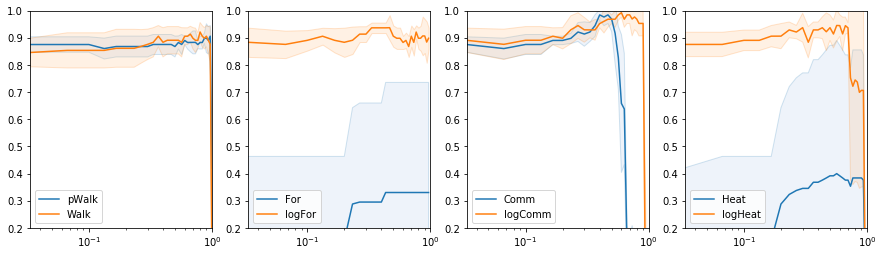

In [42]:
draw(results)

### **Fig. 2** Logarithmic vs. plain measures for G(100,(3)0.3,0.1)

In [8]:
results = defaultdict(list)
graphs, info = StochasticBlockModel(100, 3, 0.3, 0.1).generate_graphs(200)
for measure_class in [pWalk_H, Walk_H, For_H, logFor_H, Comm_H, logComm_H, Heat_H, logHeat_H]:
    results[measure_class.name] = classic_plot(measure_class, graphs, 3, 31)
# with open('results/2_2.pkl', 'wb') as f:
#     pickle.dump(results, f)

TypeError: first argument must be callable or None

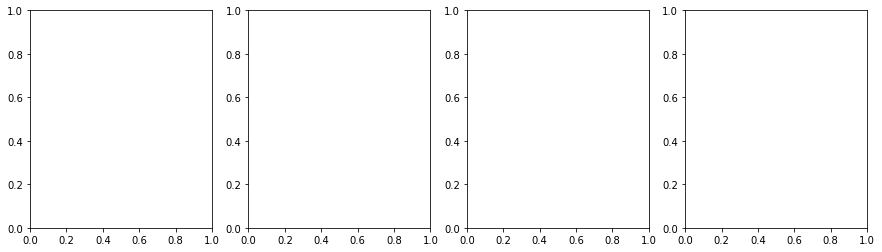

In [22]:
plot_results(results)

### **Fig. 3** Logarithmic vs. plain measures for G(200,(2)0.3,0.1)

In [10]:
results = defaultdict(list)
graphs, info = StochasticBlockModel(200, 2, 0.3, 0.1).generate_graphs(100)
for measure_class in [pWalk_H, Walk_H, For_H, logFor_H, Comm_H, logComm_H, Heat_H, logHeat_H]:
    results[measure_class.name] = classic_plot(measure_class, graphs, 2, 31)
# with open('results/2_3.pkl', 'wb') as f:
#     pickle.dump(results, f)

KeyboardInterrupt: 

In [ ]:
draw(results)